### 1
Supervised learning, prob. classification (over accident / not accident)
Supervised learning, classification (over cars / cyclists / pedestrians)
Supervised learning, prob. classification (over stop / not stop)
Unsupervised learning



### 2
While it has a benefit towards the goodness of fit, it is more critical to understand whether the model generalizes or not, from a practical point of view, since that will indicate whether its preditictions will be practically of use.
Usually, overfit. The model is too flexible (too many degrees of freedom) over data, and captures not only the underlying trend but also noise wiggling, which is the kind of information that the model should try to minimize learning from, rather than follow. This leads to good fit over data, but then bad fit over test set, where the noise in x is recognised as information, that is the predictor varies consideraly with noise (small) variations on the features.


### 3
Here are the algorithms (knn, softnn)

In [13]:
import numpy as np

def kNN_near(x,xv,k):
	n = np.size(xv, axis = 0) # counts rows
	diff = np.tile(x,(n,1)) # matrix with n observations of xd
	diff = diff - xv # they have the same dim by construction
	diff = np.linalg.norm(diff,2,axis = 1)
	return np.argpartition(diff, k)[:k]
        
def kNN(xd, xv, yv, k):
	"xv is a n x d vector, with d sample dimension, and n sample dataset cardinality"
	N = np.size(xd,axis = 0)
	res = np.empty(N)
	for i in range(N):
		nearest = kNN_near(xd[i],xv,k)
		res[i] = np.sum(yv[nearest])/np.size(nearest)
	return res

In [14]:
import numpy as np

def SNN_weights(x,xv,p):
        n = np.size(xv, axis = 0) # counts rows
        diff = np.tile(x,(n,1)) # matrix with n observations of xd
        diff = diff - xv # they have the same dim by construction
        diff = np.linalg.norm(diff,2,axis = 1)
        exps = np.exp(- diff / pow(p,2))
        return exps / np.sum(exps)
        
def SoftNN(xd, xv, yv, p):
        "xv is a n x d vector, with d sample dimension, and n sample dataset cardinality"
        n = np.size(xd,axis = 0)
        res = np.empty(n)
        for i in range(n):
                w = SNN_weights(xd[i],xv,p)
                res[i] = np.dot(w,yv)
        return res

and this is the run code

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from ee104.hw1 import SoftNN, kNN

# problem parameters

def f(x):
        if x >= 0 and x <= 1:
                return np.sin(10*x)
f_np = np.vectorize(f)      
N = 30;

# random generated data

xvec = np.random.rand(N,1)
yvec = f_np(xvec)

# visualization and comparison

xview = np.linspace(0, 1, 500)


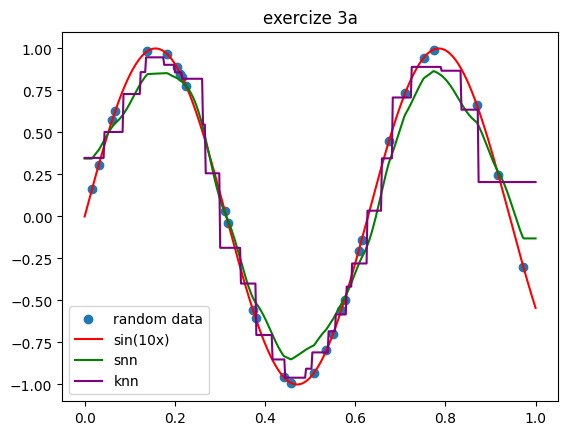

In [16]:
#over-same-graph comparison

plt.scatter(xvec,yvec,label='random data')
plt.plot(xview,f_np(xview),label='sin(10x)',color='red')
plt.plot(xview,SoftNN(xview, xvec, yvec, .2),label='snn',color='green')
plt.plot(xview,kNN(xview, xvec, yvec,3),label='knn',color='purple')
plt.legend()
plt.title("exercize 3a")
plt.show()

[0.11669638 0.13939178 0.17313848 0.1160744  0.11212718 0.08583696
 0.08936215 0.34740726]


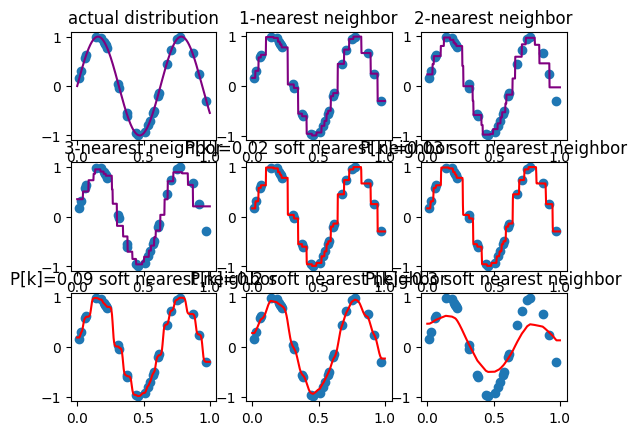

In [22]:
# different-subplots + numerical comparison

plt.subplot(3,3,1)
yview = f_np(xview)
plt.scatter(xvec,yvec,label='random data')
plt.plot(xview,yview,label='knn',color='purple')
plt.title("actual distribution")
        
E = np.empty(8);
for k in [1,2,3]:
        plt.subplot(3,3,k+1)
        currview = kNN(xview, xvec, yvec,k)
        plt.scatter(xvec,yvec,label='random data')
        plt.plot(xview,currview,label='knn',color='purple')
        plt.title(f"{k}-nearest neighbor")
        E[k-1] = np.linalg.norm(yview-currview,2)/np.power(500,.5)
 
P = np.array([.5,1,3,5,10]) * np.sqrt(.001)
for k in range(5):
        plt.subplot(3,3,k+5)
        currview = SoftNN(xview, xvec, yvec,P[k])
        plt.scatter(xvec,yvec,label='random data')
        plt.plot(xview,currview,label='snn',color='red')
        plt.title(f"{P[k]=:.1} soft nearest neighbor")
        E[3+k] = np.linalg.norm(yview-currview,2)/np.power(500,.5)

print(E)
plt.show()


# 4
we embedd all degrees of freedom associated with the model. That is, all the polynomial respecting constraints. These are


In [18]:
import math
print(math.comb(6,3) - 3)

17



where the first come from putting 3 separators between 3 placeholders (total degrees), dividing the degrees in

u1 | u2 | u3 | 3 - degree of the monomial

and the 3 are given by illegal configurations 3000 0300 0030.

# 5
The hard model can be chosen "by MLE" simply by taking the mode of the distribution PMF.
The interval in soft moel can be chosen by ordering the array according to the PMF weights and then sum weights until .9 is reached, and extract that set. Here are two snippets, for p the probabilistic estimate of the model.P

In [19]:
import numpy as np

# random distribution PMF
# this represents the prob. prediction given a certain data xdata
p = np.random.rand(30)
p = p/np.sum(p)

# hard model
x_pred = (range(1,31))[np.argmax(p)]

# confidence interval
ordered = np.argsort(p)
sum = 0
i = 0
while sum < .9:
        sum += p[ordered[i]]
        i += 1

# print
print(ordered[1:i-1])
print(sum)



[20 22 27 16 28 21 23 12 29 19 17  8 25 15 14  9 10  5  4  3 26  7  0 24
 13  1  2]
0.9341471961225142
